## Домашнее задание 1 - Часть 1

### Множество Жюлиа

Для фиксированного комплексного числа **c**, множество Жюлиа **J(c)** — это множество комплексных чисел $\mathbf{z_0}$, для которых последовательность
$$
z_{i+1} = z_i^2 + c
$$
расходится.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Постройте двумерный график ( по осям **Re(z), Im(z)**), при фиксированном **c** (в примере 0.1+0.5i) с использованием 2 цветов (один цвет для сходящейся точки, другой — для расходящейся).

In [2]:
def iterate_until_nan(z_0: complex, c: complex, max_iterations: int = 20):
    """Iteration process to see if z_0 converges or diverges
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int: zero if the iteration diverged,
             one if we reach max_iterations and we still
             haven't reached nan
    """
    while max_iterations > 0:
      z = z_0**2 + c
      z_0 = z
      max_iterations -= 1
      if abs(z) > 2:
        return 0
    return 1

def julia_convergence(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = iterate_until_nan(complex(x, y), c)
    return img

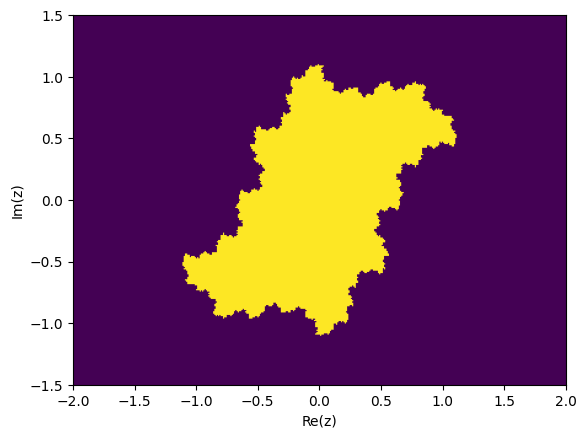

In [3]:
plt.imshow(julia_convergence(0.1+0.5j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

2. Придумайте логику из более чем двух цветов и нарисуйте картинку

In [4]:
def julia(z_0: complex, c: complex = 1, n_iterations: int = 20):
    """Iteration process much like iterate_until_nan
       but you need think of some logic to give different
       values of z different colors
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int
    """
    for n in range(n_iterations):
      z = z_0**2 + c
      z_0 = z
      if abs(z) > 2:
        return n
    return n_iterations

def julia_set(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = julia(complex(x, y), c)
    return img

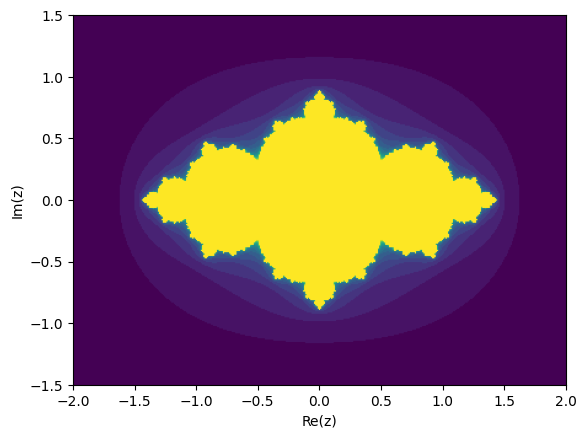

In [5]:
plt.imshow(julia_set(-0.65+0j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

3. Нарисуйте множество Мандельброта (как в Википедии)

в чем разница?

In [6]:
def iterate_until_nan(c: complex, max_iterations: int = 20):
    """Iteration process to see if z_0 converges or diverges
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int: zero if the iteration diverged,
             one if we reach max_iterations and we still
             haven't reached nan
    """
    z_0 = 0
    while max_iterations > 0:
      z = z_0**2 + c
      z_0 = z
      max_iterations -= 1
      if abs(z) > 2:
        return 0
    return 1

def mandelbrot(extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = iterate_until_nan(complex(x, y))
    return img

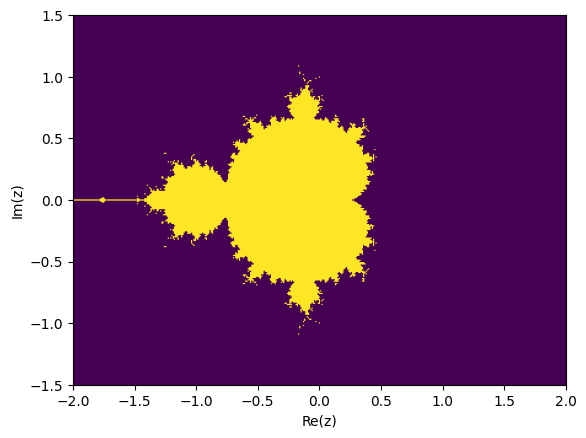

In [7]:
plt.imshow(mandelbrot(), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

Отличие построения множества Мандельброта от множества Жулиа в том, что
- начальная точка (z_0) равна 0, а не формируется пробегаясь на плоскости
- с формируется пробегаясь по плоскости, а не заданное фиксированное число

## Домашнее задание 1 - Часть 2

### профилировка

При запуске файла **script.py** выполняется некий расчет:

In [9]:
!python script.py

dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:23<00:00, 53.12it/s]


После выполнения расчета сохраняется картинка

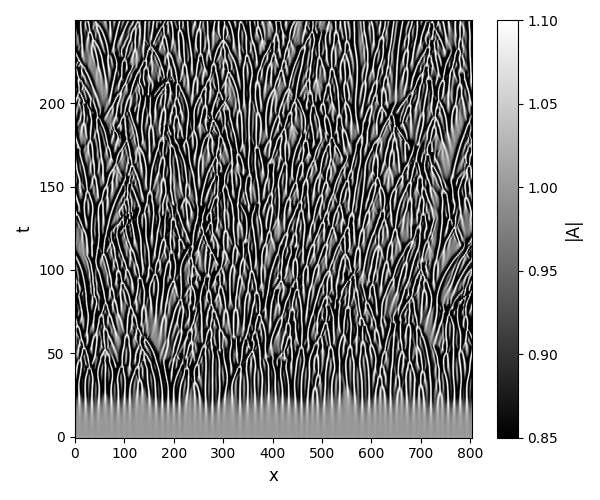

In [10]:
from PIL import Image

img = Image.open("./res.png")
display(img)

Задания:
1. Нарисовать график потребления памяти от времени исполнения **script.py**.
2. В файле **script.py** определены 8 функций. Построить график, наглядно демонстрирующий сколько времени проводится внутри каждой из этих 8 функций.  
   Если вызывается функция, которая вложена в другую, то время исполнения засчитывается обеим функциям
3. В файле **script.py** есть параметр **N**. Что будет с полной используемой памятью и временем исполнения если поварьировать этот параметр? Покажите, построив график. (Только уберите перед этим вызов функции **plot_1D_heatmap**)

Можно пользоваться любыми профилировщиками, вот примеры:
1. https://pypi.org/project/scalene/0.9.15/
2. https://docs.python.org/3/library/profile.html#module-profile
3. https://pypi.org/project/memory-profiler/

In [11]:
!pip install memory_profiler

In [12]:
!mprof run --python script.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:24<00:00, 50.64it/s]


In [13]:
!mprof plot -o memory.png

Using last profile data.


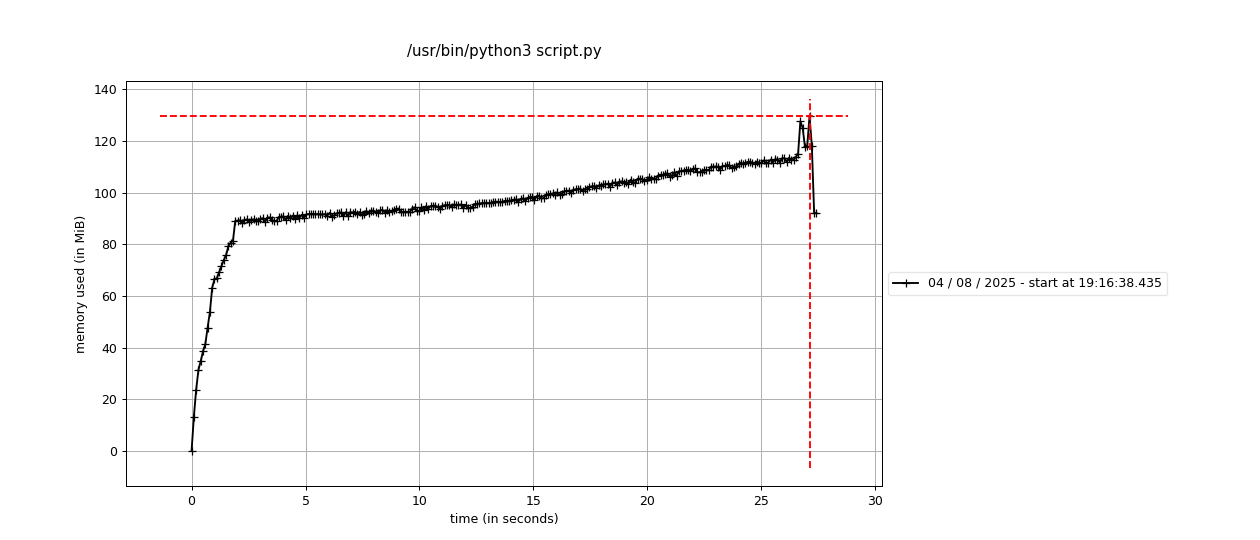

In [14]:
from IPython.display import Image
Image('memory.png')

In [15]:
import cProfile
import io
import pstats
import re

In [16]:
!python -m cProfile -o time script.py

dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:19<00:00, 62.81it/s]


In [17]:
s = io.StringIO()
ps = pstats.Stats('time', stream=s).strip_dirs().sort_stats(-1)
ps.print_stats()
profiling_result = s.getvalue()
print(profiling_result)

Mon Aug  4 19:17:42 2025    time

         1823432 function calls (1792550 primitive calls) in 23.033 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <decorator-gen-0>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-100>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-101>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-102>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-103>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-104>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-105>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-106>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-107>:1(<module>)
        1    0.000    0.000    0.000    0.000 <decorator-gen-10>:1(<module>)
        1 

In [18]:
data = []
for line in profiling_result.split('\n'):
    if "cumtime" in line:
      parts = re.split(r'\s+', line.strip())
      id = parts.index("cumtime")
    if "script.py" in line:
        parts = re.split(r'\s+', line.strip())
        if len(parts) >= 6:
            func_name = parts[-1].split(":")[-1].strip(")").split("(")[1]
            cum_time = float(parts[id])
            data.append((func_name, cum_time))

data

[('<module>', 23.042),
 ('generate_domains', 0.004),
 ('script_args', 0.0),
 ('initial_conditions', 0.0),
 ('add_noize', 0.012),
 ('non_linear_step', 1.633),
 ('computation_loop', 19.763),
 ('iterations', 19.912),
 ('ScriptMagics', 0.005),
 ('plot_1D_heatmap', 1.527)]

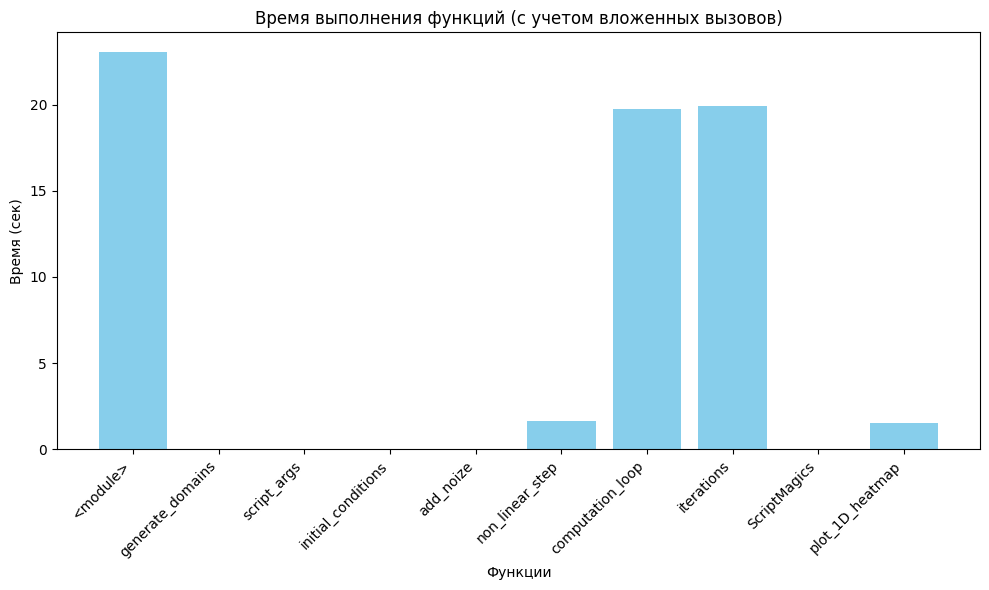

In [19]:
functions = [item[0] for item in data]
times = [item[1] for item in data]

plt.figure(figsize=(10, 6))
plt.bar(functions, times, color='skyblue')
plt.xlabel('Функции')
plt.ylabel('Время (сек)')
plt.title('Время выполнения функций (с учетом вложенных вызовов)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
!cat script.py

import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from tqdm import tqdm
import sys

c = 1.5
cc = 2.1
dd = 1.
gamma = cc - c*1j

d = 0.1
# N = 12871
x_max = 128.0*np.pi

def generate_domains(N):
    if N%2 == 0:
        print("please make N an odd number")
        return 0, 0
    domain = np.linspace(-x_max, x_max, N)
    dx = (domain[1]-domain[0])
    f_domain = np.fft.fftfreq(domain.shape[0], dx)
    x = [domain]
    omega = [f_domain]
    print("dx:", dx)
    print("k_max: ", f_domain[len(f_domain)//2])
    print("k_min: ", f_domain[len(f_domain)//2+1])
    return x, omega

def initial_conditions(shape):
    A = np.ones(shape, dtype=np.complex128)
    A.imag = 0.
    return A

def add_perturb_1D(A, a, k, func, real, x):
    res = copy(A)
    if real:
        res.real += a*func(k*x)
    else:
        res.imag += a*func(k*x)
    return res

def add_noize(A):
    return A + 0.1*np.random.rand(*A.shape)

def non_linear_step(A, m, q, Om, i, dt):
    temp = np.empty(

In [21]:
import time
import subprocess
from memory_profiler import memory_usage

In [22]:
def run_script(N):
    cmd = ["python", "script.py", str(N)]

    start_time = time.time()
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    process.communicate()
    elapsed_time = time.time() - start_time

    mem_usage = memory_usage((subprocess.run, (cmd,)), max_usage=True)

    return elapsed_time, mem_usage

In [23]:
times = []
memories = []
N = 12871
N_values = range(int(0.5*N), int(1.5*N), 500)
for n in N_values:
    t, mem = run_script(n)
    times.append(t)
    memories.append(mem)
    print(f"N = {n}: Время = {t:.4f} сек, Память = {mem:.2f} MiB")

N = 6435: Время = 3.3043 сек, Память = 126.79 MiB
N = 6935: Время = 5.2009 сек, Память = 126.94 MiB
N = 7435: Время = 13.3068 сек, Память = 126.95 MiB
N = 7935: Время = 3.9184 сек, Память = 126.96 MiB
N = 8435: Время = 12.4886 сек, Память = 127.09 MiB
N = 8935: Время = 12.5746 сек, Память = 127.09 MiB
N = 9435: Время = 4.8042 сек, Память = 127.09 MiB
N = 9935: Время = 15.9304 сек, Память = 127.09 MiB
N = 10435: Время = 12.9419 сек, Память = 127.10 MiB
N = 10935: Время = 5.2912 сек, Память = 127.12 MiB
N = 11435: Время = 20.7331 сек, Память = 127.12 MiB
N = 11935: Время = 6.9825 сек, Память = 127.13 MiB
N = 12435: Время = 22.2104 сек, Память = 127.13 MiB
N = 12935: Время = 22.5436 сек, Память = 127.16 MiB
N = 13435: Время = 21.4465 сек, Память = 127.16 MiB
N = 13935: Время = 27.4108 сек, Память = 127.16 MiB
N = 14435: Время = 23.2188 сек, Память = 127.16 MiB
N = 14935: Время = 11.0619 сек, Память = 127.16 MiB
N = 15435: Время = 6.8022 сек, Память = 127.16 MiB
N = 15935: Время = 28.6360 

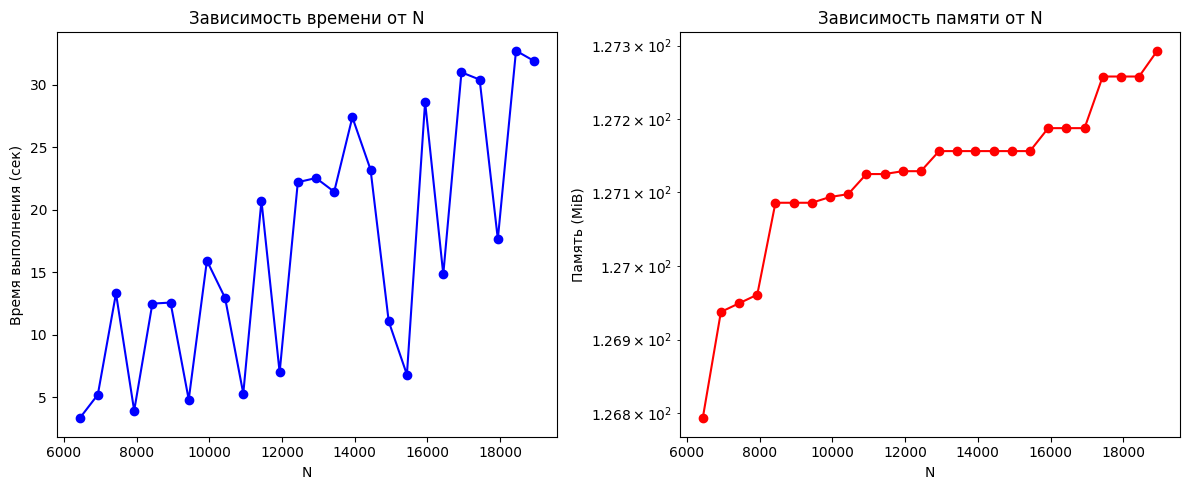

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(N_values, times, 'bo-')
plt.xlabel('N')
plt.ylabel('Время выполнения (сек)')
plt.title('Зависимость времени от N')

plt.subplot(1, 2, 2)
plt.plot(N_values, memories, 'ro-')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Память (MiB)')
plt.title('Зависимость памяти от N')

plt.tight_layout()
plt.show()